## Exploratory Data Analysis on Phone-collected Noise Pollution Data

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from geopy.distance import great_circle
from geopy.distance import geodesic

In [7]:
noise_data = pd.read_csv("../build_Noise-Capture-Form_1614927724.csv")
noise_data.head()

/home/lydia/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise-Noise_Source,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2021-05-28T10:44:51.279Z,uuid:56329827-f210-4cbe-a411-a802d930cef6,1622125909391.wav,63,10,NaN,NaN,0.522326,32.624110,1141.518879,184.385,NaN,uuid:56329827-f210-4cbe-a411-a802d930cef6,39,njoan,1,1,NaN
1,2021-05-28T09:32:22.838Z,uuid:71130ff8-876a-4ae5-b566-729d03386bc8,1622125883864.wav,59,10,NaN,NaN,0.521330,32.629754,1121.944560,3.900,NaN,uuid:71130ff8-876a-4ae5-b566-729d03386bc8,39,njoan,1,1,NaN
2,2021-05-28T09:30:52.241Z,uuid:4b8f18f3-f744-4d7a-aaef-3d2f4571a5ab,1622125859350.wav,59,10,NaN,NaN,0.521412,32.630024,1120.129591,3.900,NaN,uuid:4b8f18f3-f744-4d7a-aaef-3d2f4571a5ab,39,njoan,1,1,NaN
3,2021-05-28T09:29:25.503Z,uuid:1e8f0ccb-11da-4ff7-8579-72467093abb7,1622125834260.wav,72,10,NaN,NaN,0.521199,32.629706,1063.785425,15.000,NaN,uuid:1e8f0ccb-11da-4ff7-8579-72467093abb7,39,njoan,1,1,NaN
4,2021-05-28T09:28:54.524Z,uuid:1335d0e5-6d31-4e4a-b8ff-69d16320a5fe,1622125810229.wav,69,10,NaN,NaN,0.521355,32.629828,1120.042674,3.900,NaN,uuid:1335d0e5-6d31-4e4a-b8ff-69d16320a5fe,39,njoan,1,1,NaN


In [8]:
noise_data.dtypes

SubmissionDate               object
meta-instanceID              object
Noise-audio                  object
Noise-Noise_Measurement      object
Noise-Noise_Source           object
Noise-Noise_Source_2         object
Noise-Noise_Source_3         object
Noise-Location-Latitude     float64
Noise-Location-Longitude    float64
Noise-Location-Altitude     float64
Noise-Location-Accuracy     float64
Noise-Comment                object
KEY                          object
SubmitterID                   int64
SubmitterName                object
AttachmentsPresent            int64
AttachmentsExpected           int64
Status                      float64
dtype: object

#### Rename columns for easier querying

In [9]:
new_col_names = {"Noise-Noise_Source": "Noise_Category"}
noise_data.rename(columns=new_col_names, inplace=True)
noise_data.head()

,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise_Category,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2021-05-28T10:44:51.279Z,uuid:56329827-f210-4cbe-a411-a802d930cef6,1622125909391.wav,63,10,NaN,NaN,0.522326,32.624110,1141.518879,184.385,NaN,uuid:56329827-f210-4cbe-a411-a802d930cef6,39,njoan,1,1,NaN
1,2021-05-28T09:32:22.838Z,uuid:71130ff8-876a-4ae5-b566-729d03386bc8,1622125883864.wav,59,10,NaN,NaN,0.521330,32.629754,1121.944560,3.900,NaN,uuid:71130ff8-876a-4ae5-b566-729d03386bc8,39,njoan,1,1,NaN
2,2021-05-28T09:30:52.241Z,uuid:4b8f18f3-f744-4d7a-aaef-3d2f4571a5ab,1622125859350.wav,59,10,NaN,NaN,0.521412,32.630024,1120.129591,3.900,NaN,uuid:4b8f18f3-f744-4d7a-aaef-3d2f4571a5ab,39,njoan,1,1,NaN
3,2021-05-28T09:29:25.503Z,uuid:1e8f0ccb-11da-4ff7-8579-72467093abb7,1622125834260.wav,72,10,NaN,NaN,0.521199,32.629706,1063.785425,15.000,NaN,uuid:1e8f0ccb-11da-4ff7-8579-72467093abb7,39,njoan,1,1,NaN
4,2021-05-28T09:28:54.524Z,uuid:1335d0e5-6d31-4e4a-b8ff-69d16320a5fe,1622125810229.wav,69,10,NaN,NaN,0.521355,32.629828,1120.042674,3.900,NaN,uuid:1335d0e5-6d31-4e4a-b8ff-69d16320a5fe,39,njoan,1,1,NaN


In [10]:
noise_data = noise_data[~noise_data["Noise_Category"].isin(["Mobile-music", "Other", "car-OR-truck"])]

In [11]:
noise_data["Noise_Category"] = noise_data["Noise_Category"].astype("int64")
noise_data.dtypes

SubmissionDate               object
meta-instanceID              object
Noise-audio                  object
Noise-Noise_Measurement      object
Noise_Category                int64
Noise-Noise_Source_2         object
Noise-Noise_Source_3         object
Noise-Location-Latitude     float64
Noise-Location-Longitude    float64
Noise-Location-Altitude     float64
Noise-Location-Accuracy     float64
Noise-Comment                object
KEY                          object
SubmitterID                   int64
SubmitterName                object
AttachmentsPresent            int64
AttachmentsExpected           int64
Status                      float64
dtype: object

In [12]:
category_gb = noise_data.groupby(by="Noise_Category").count()
category_gb

,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
Noise_Category,,,,,,,,,,,,,,,,,
1,1841,1841,1841,1828,1553,1051,1841,1841,1841,1841,8,1841,1841,1841,1841,1841,0
2,1854,1854,1854,1841,259,68,1854,1854,1854,1854,0,1854,1854,1854,1854,1854,0
3,1552,1552,1552,1548,853,399,1552,1552,1552,1552,9,1552,1552,1552,1552,1552,0
4,3368,3368,3368,3338,75,24,3368,3368,3368,3368,0,3368,3368,3368,3368,3368,0
5,1304,1304,1304,1296,38,4,1304,1304,1304,1304,0,1304,1304,1304,1304,1304,0
6,1467,1467,1467,1463,43,17,1467,1467,1467,1467,0,1467,1467,1467,1467,1467,0
7,1674,1674,1674,1666,112,53,1674,1674,1674,1674,0,1674,1674,1674,1674,1674,0
8,2164,2164,2164,2161,165,26,2164,2164,2164,2164,0,2164,2164,2164,2164,2164,0
9,2550,2550,2550,2545,49,21,2550,2550,2550,2550,5,2550,2550,2550,2550,2550,0


In [14]:
categories = {1:"car-or-truck", 2:"motor-vehicle-horn", 3:"bodaboda-motorcycle", 4:"motor-vehicle-siren", 5:"car-alarm", 6:"mobile-music", 7:"hawker-vendor", 8:"community-radio", 9:"religious-venue", 10:"herbalists", 11:"construction-site", 12:"fabrication-workshop", 13:"generators", 14:"bar/restaurant/night-club", 15:"animal", 16:"crowd-noise", 17:"schools", 18:"street-preachers", 19:"other"}
noise_data["Noise_Category"] = noise_data["Noise_Category"].map(categories)
noise_data.head()

,SubmissionDate,meta-instanceID,Noise-audio,Noise-Noise_Measurement,Noise_Category,Noise-Noise_Source_2,Noise-Noise_Source_3,Noise-Location-Latitude,Noise-Location-Longitude,Noise-Location-Altitude,Noise-Location-Accuracy,Noise-Comment,KEY,SubmitterID,SubmitterName,AttachmentsPresent,AttachmentsExpected,Status
0,2021-05-28T10:44:51.279Z,uuid:56329827-f210-4cbe-a411-a802d930cef6,1622125909391.wav,63,herbalists,NaN,NaN,0.522326,32.624110,1141.518879,184.385,NaN,uuid:56329827-f210-4cbe-a411-a802d930cef6,39,njoan,1,1,NaN
1,2021-05-28T09:32:22.838Z,uuid:71130ff8-876a-4ae5-b566-729d03386bc8,1622125883864.wav,59,herbalists,NaN,NaN,0.521330,32.629754,1121.944560,3.900,NaN,uuid:71130ff8-876a-4ae5-b566-729d03386bc8,39,njoan,1,1,NaN
2,2021-05-28T09:30:52.241Z,uuid:4b8f18f3-f744-4d7a-aaef-3d2f4571a5ab,1622125859350.wav,59,herbalists,NaN,NaN,0.521412,32.630024,1120.129591,3.900,NaN,uuid:4b8f18f3-f744-4d7a-aaef-3d2f4571a5ab,39,njoan,1,1,NaN
3,2021-05-28T09:29:25.503Z,uuid:1e8f0ccb-11da-4ff7-8579-72467093abb7,1622125834260.wav,72,herbalists,NaN,NaN,0.521199,32.629706,1063.785425,15.000,NaN,uuid:1e8f0ccb-11da-4ff7-8579-72467093abb7,39,njoan,1,1,NaN
4,2021-05-28T09:28:54.524Z,uuid:1335d0e5-6d31-4e4a-b8ff-69d16320a5fe,1622125810229.wav,69,herbalists,NaN,NaN,0.521355,32.629828,1120.042674,3.900,NaN,uuid:1335d0e5-6d31-4e4a-b8ff-69d16320a5fe,39,njoan,1,1,NaN


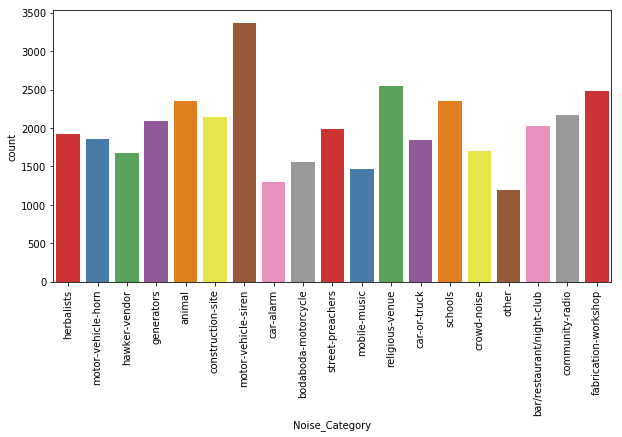

In [20]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=noise_data,
    x="Noise_Category",
    palette="Set1"
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None

### Payments calculation

In [39]:
noise_data["SubmissionDate"] = pd.to_datetime(noise_data["SubmissionDate"], format="%Y-%m-%d")

In [5]:
submitters = list(noise_data["SubmitterName"].unique())
submitters

['musa',
 'njoan',
 'njohn',
 'ncrispus',
 'oisaac',
 'cuthbert',
 'ojulius',
 'ostephen',
 'snsumba',
 'djoshua']

In [20]:
def calculate_payment(submitter, date_range):
    # noise_data = noise_data[noise_data["SubmissionDate"] == date_range]
    num_submissions = noise_data[noise_data["SubmitterName"] == submitter].shape[0]
    payment = num_submissions * 300
    return payment

In [21]:
calculate_payment("musa", "")

305400

In [22]:
for submitter in submitters:
    payments = calculate_payment(submitter, "")
    print(payments)

305400
56100
9900
3600
247200
113100
43500
600
1500
600
